# **Importing the required modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading the dataset**

In [2]:
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')

In [3]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (1599, 12)


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Checking for missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# **Exploratory data analysis(EDA)**

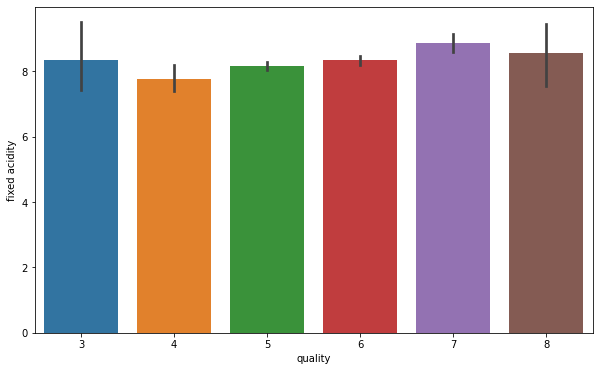

In [8]:
#Here we see that fixed acidity does not give any specification to classify the quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

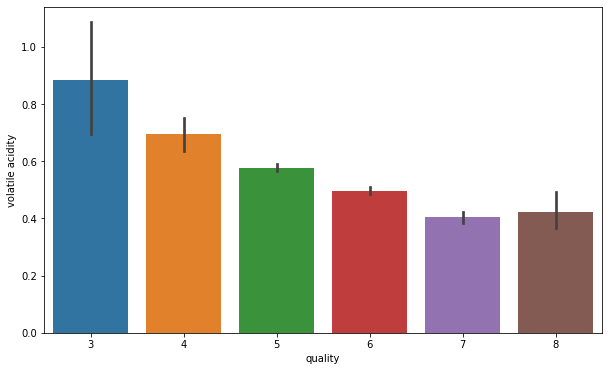

In [9]:
#Here we see that the volatile acidity decreases as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

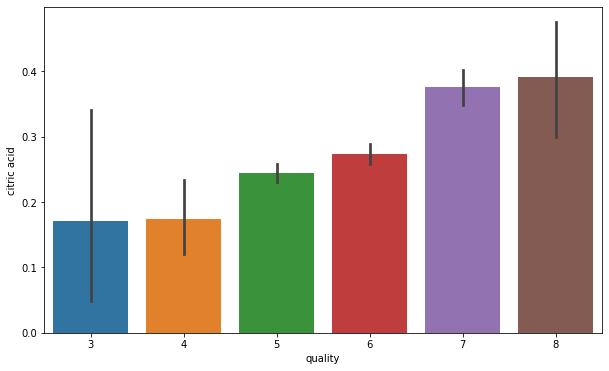

In [10]:
#Citric acid has an increasing trend with qulaity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

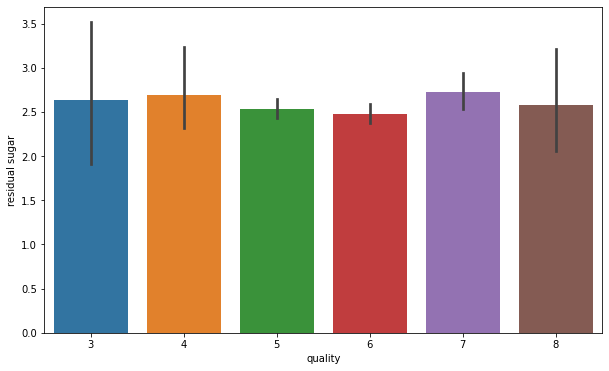

In [11]:
#Residual sugar does not vary much wrt quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

In [12]:
fig = px.histogram(df,x='quality')
fig.show()

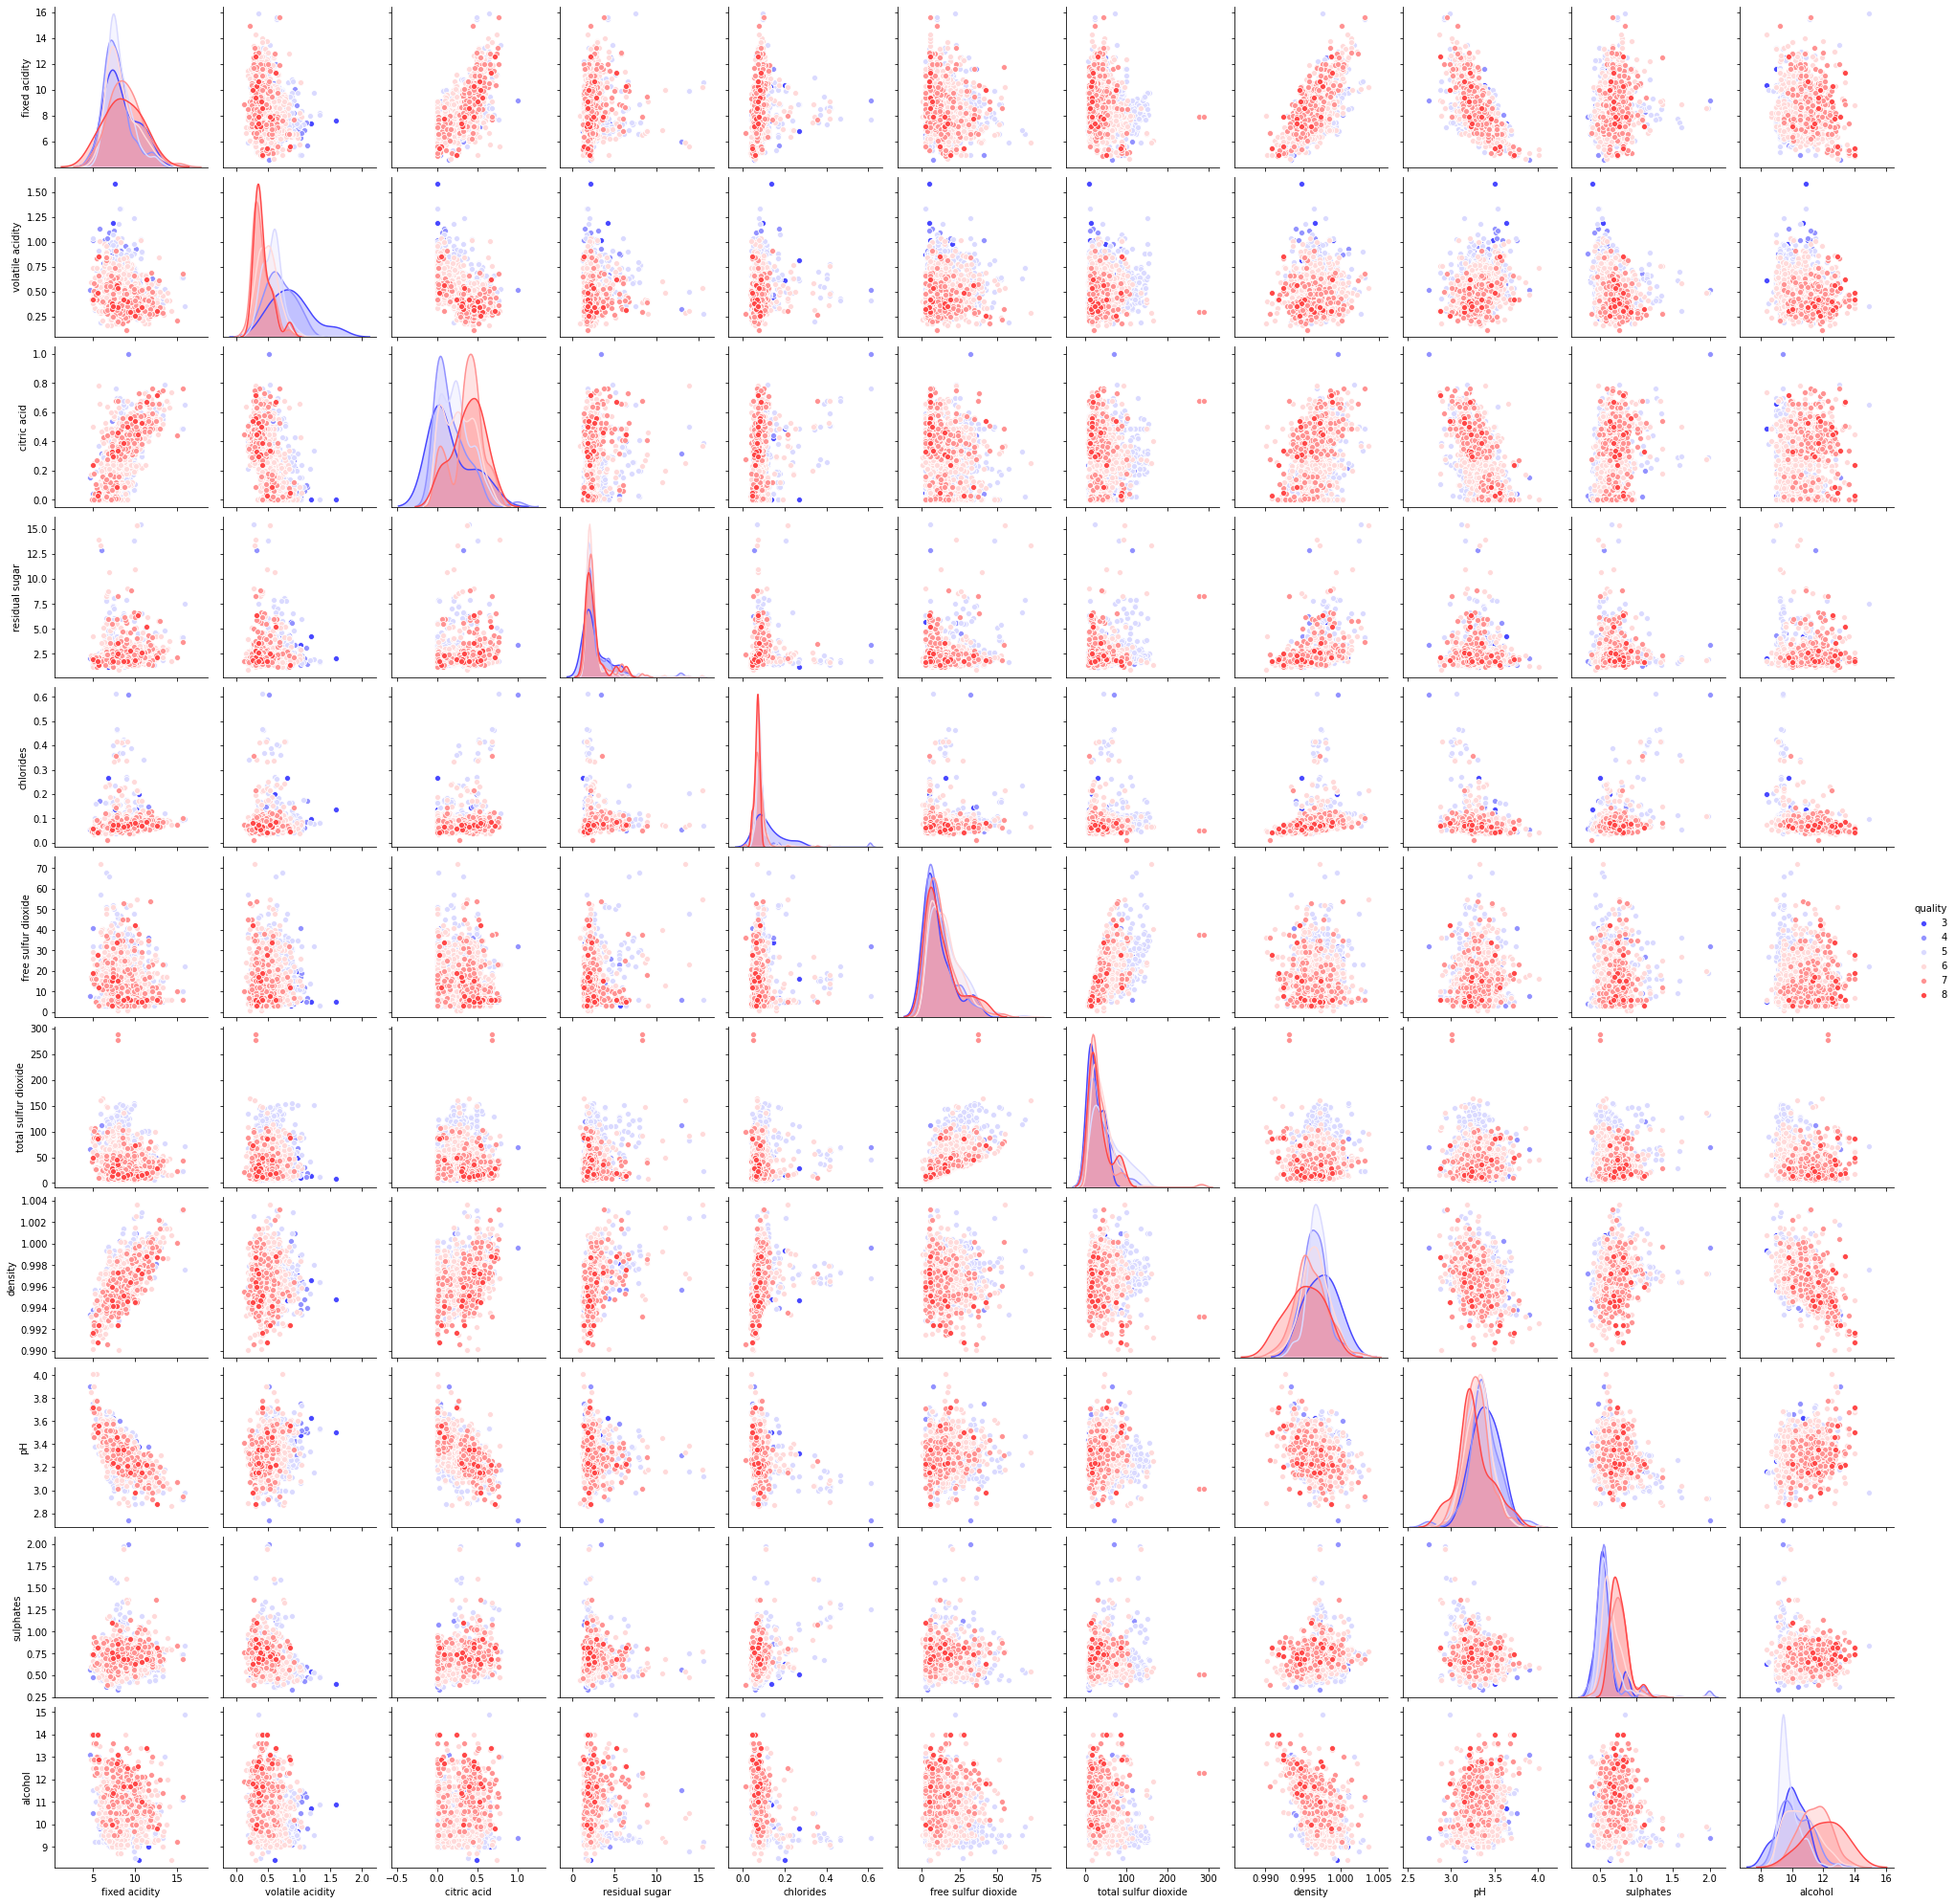

In [13]:
sns.pairplot(df,hue='quality',palette='bwr')

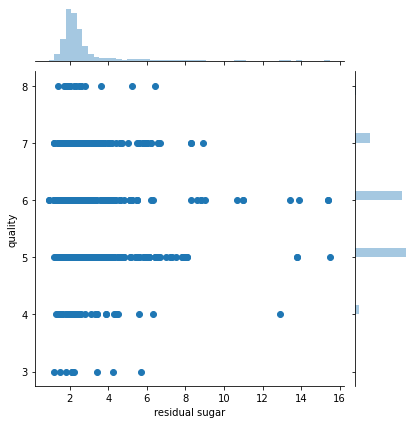

In [14]:
sns.jointplot(x='residual sugar',y='quality',data=df)

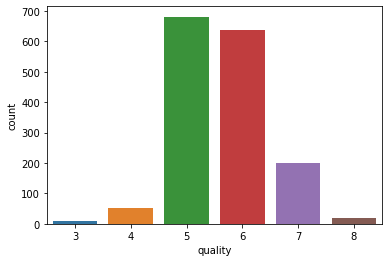

In [15]:
sns.countplot(df['quality'])

# **Preprocessing of data**

In [16]:
#Since its a classification problem we take another attribute named good quality that has only 2 states (i.e. 1 for good quality an 0 for bad quality)
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [17]:
#Checking the proportion
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

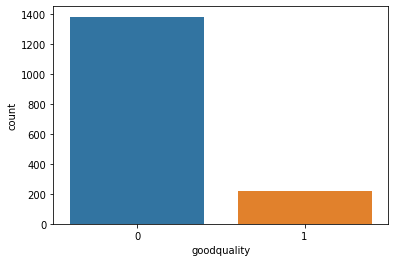

In [18]:
sns.countplot(df['goodquality'])

In [19]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
#X_features = X
X = StandardScaler().fit_transform(X)

# **Splitting the data**

In [20]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# **Modelling**

## **1) SVC**

In [21]:
from sklearn.svm import SVC
model = SVC()

In [22]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
print(confusion_matrix(y_test,predictions))

[[419  11]
 [ 32  18]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.62      0.36      0.46        50

    accuracy                           0.91       480
   macro avg       0.77      0.67      0.70       480
weighted avg       0.90      0.91      0.90       480



In [27]:
from sklearn.model_selection import GridSearchCV
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVC(), param_grid=param,refit=True,verbose=3)

In [28]:
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.848, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.852, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.848, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.8, kernel=linear, score=0.852, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.848, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.848, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.852, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   19.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.8, 'kernel': 'rbf'}

In [30]:
grid_pred=grid_svc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,grid_pred))

[[421   9]
 [ 27  23]]


In [32]:
print(accuracy_score(y_test,grid_pred))

0.925


In [33]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       430
           1       0.72      0.46      0.56        50

    accuracy                           0.93       480
   macro avg       0.83      0.72      0.76       480
weighted avg       0.92      0.93      0.92       480



## **2) Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
print(confusion_matrix(y_test,predictions))

[[412  18]
 [ 31  19]]


In [39]:
print(accuracy_score(y_test,predictions))

0.8979166666666667


In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       430
           1       0.51      0.38      0.44        50

    accuracy                           0.90       480
   macro avg       0.72      0.67      0.69       480
weighted avg       0.89      0.90      0.89       480



## **3) Random forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2))


[[414  16]
 [ 21  29]]
0.9229166666666667
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480

